In [36]:
import numpy as np

import pandas as pd

In [17]:
! pip install matplotlib

     ---------------------------------------- 0.0/162.2 kB ? eta -:--:--
     ----------------------------------- -- 153.6/162.2 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 162.2/162.2 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.6 MB 5.4 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.6 MB 10.5 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/7.6 MB 10.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/7.6 MB 11.0 MB/s eta 0:00:01
   -------------- ------------------------- 2.7/7.6 MB 11.5 MB/s eta 0:00:01
   ----------------- ---------------------- 3.3/7.6 MB 11.8 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/7.6 MB 12.1 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/7.6 MB 12.1 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.6 MB 9.5 MB/s eta 0:00:01
   ----


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import matplotlib.pyplot as plt

In [20]:
titanic_df=pd.read_csv('titanic_test_data.csv')

In [22]:
titanic_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [24]:
titanic_df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [38]:
titanic_df['embarked_new']=np.where(titanic_df['Embarked']=='C','Cherbourg',
                                    np.where(titanic_df['Embarked']=='Q','Queensland',
                                             'Southampton'))

In [29]:
titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
titanic_df['mr_mrs']=np.where(titanic_df['Name'].str.contains('Mrs.'),"Mrs',
                              np.where(titanic_df['Name'].str.contains('Ms.'), 'Ms',
                                       'Mr'))

SyntaxError: EOL while scanning string literal (3004498655.py, line 1)

In [32]:
titanic_df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

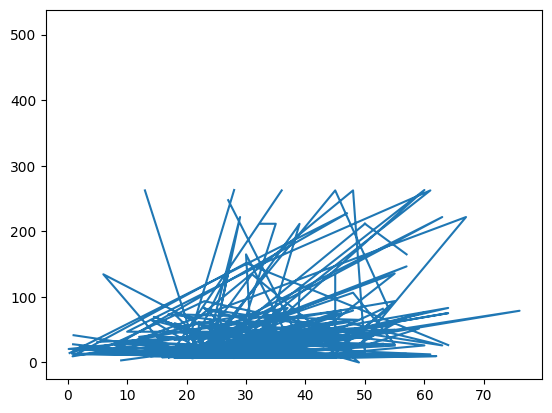

In [40]:
# basic plots:
# (x-axis, y-axis)
plt.plot(titanic_df['Age'], titanic_df['Fare'])

(array([ 46.,   0.,   0.,   0.,   0., 270.,   0.,   0.,   0., 102.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

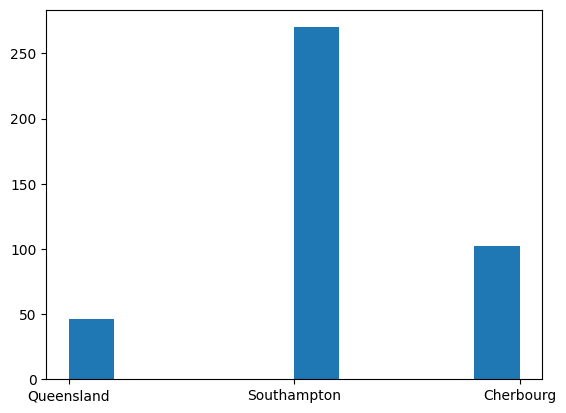

In [42]:
# histogram: onlt plot one event
plt.hist(titanic_df['embarked_new'])

Text(0.5, 1.0, 'Port of Embarcation Frequency')

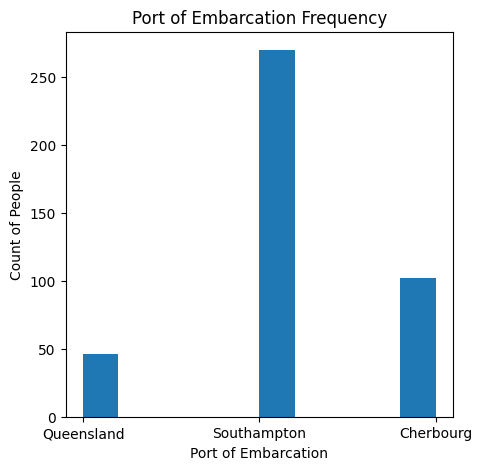

In [43]:
plt.figure(figsize=[5,5])
plt.hist(titanic_df['embarked_new'])
plt.xlabel('Port of Embarcation')
plt.ylabel('Count of People')
plt.title('Port of Embarcation Frequency')

In [45]:
# Pie charts
agg_gender=titanic_df.groupby('Sex').count()
agg_gender

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_new
Sex,,,,,,,,,,,
female,152,152,152,127,152,152,152,152,44,152,152
male,266,266,266,205,266,266,266,265,47,266,266


<Axes: ylabel='PassengerId'>

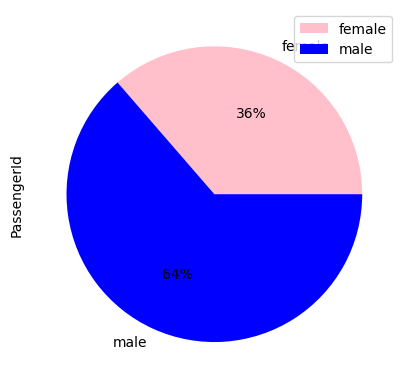

In [49]:
colors=['pink', 'blue']
agg_gender.plot(kind='pie', y='PassengerId',autopct='%1.0f%%', colors=colors)